Customer Segmentation and Analysis
Steps to solve the problem :


EDA and visualization.
Clustering using K-Means.
Selection of Clusters.
Ploting the Cluster Boundry and Clusters.
3D Plot of Clusters.


Description Variables:
CustomerID: Unique ID assigned to the customer
Gender: Gender of the customer
Age: Age of the customer
Annual Income (k$): Annual Income of the customee
Spending Score (1–100): Score assigned by the mall based on customer behavior and spending nature.


# clustering:-
All the data points in a cluster should be similar to each other.
The data points from different clusters should be as different as possible.

# import library and data sets

In [203]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [204]:
mall=pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

# EDA and visualization

In [205]:
mall.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [206]:
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [207]:
mall.shape

(200, 5)

In [208]:
mall.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [209]:
mall.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [210]:
mall.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

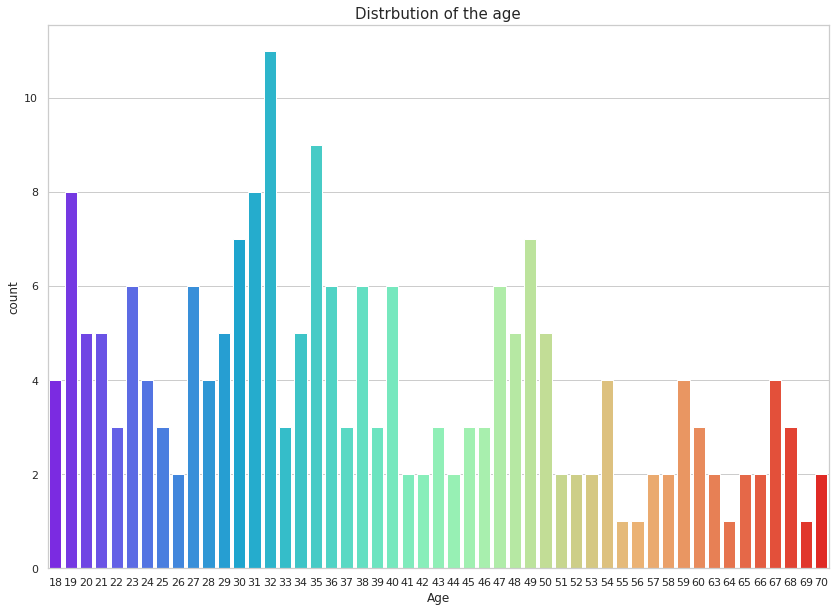

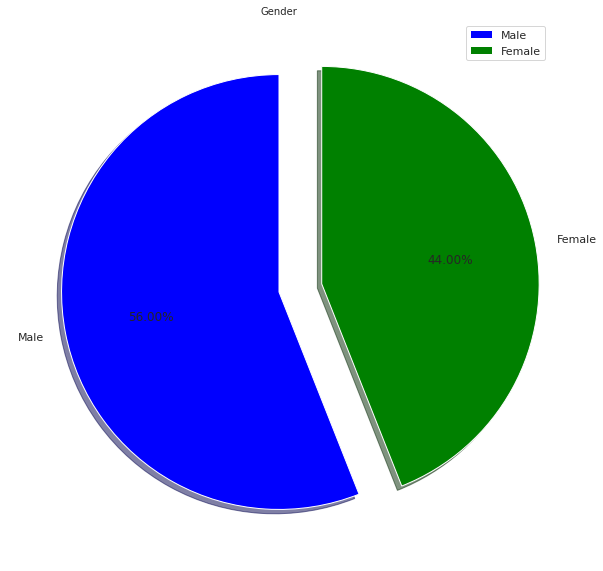

In [211]:
#find relation ship among the data sets
#percentage of mail and feail
sns.countplot(mall['Age'],palette = 'rainbow')
plt.title('Distrbution of the age',fontsize=15)
label=['Male','Female']
values=mall['Gender'].value_counts().values
colors=['blue','green']
fig,ax1=plt.subplots()
plt.axis('off')
explode = [0, 0.2]
ax1.pie(values,labels=label,shadow=True,startangle=90,autopct ='%.2f%%',explode = explode,colors=colors)
plt.title('Gender', fontsize =10)
plt.legend()
plt.show()

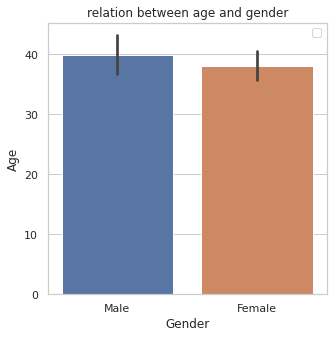

In [212]:
plt.figure(figsize=(5,5))
sns.barplot(x='Gender',y='Age',data=mall)
plt.title('relation between age and gender')
plt.legend()

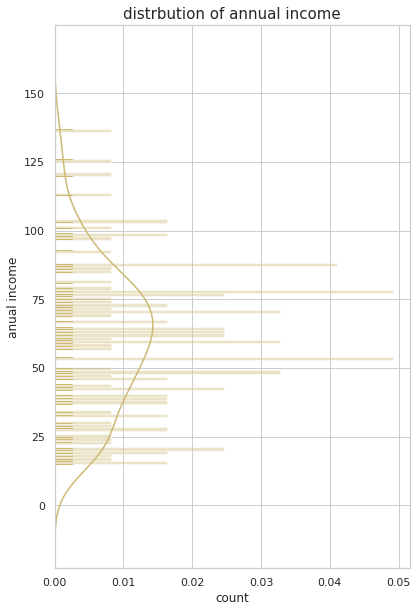

In [213]:
import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (14, 10)

plt.subplot(1,2,1)
sns.distplot(mall['Annual Income (k$)'],bins=100,color='y',vertical=True,rug=True)
plt.ylabel('anual income')
plt.xlabel('count')
plt.title('distrbution of annual income',fontsize=15)
plt.show()

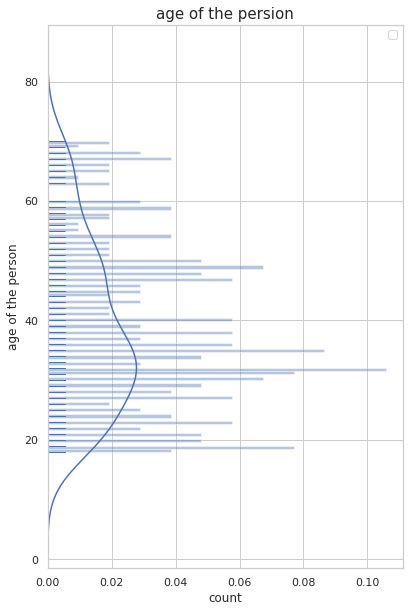

In [214]:

sns.set(style='whitegrid')
plt.subplot(1,2,2)
sns.distplot(mall['Age'],bins=100,color='b',vertical=True,rug=True)
plt.ylabel('age of the person')
plt.xlabel('count')
plt.title('age of the persion',fontsize=15)
plt.legend()
plt.show()

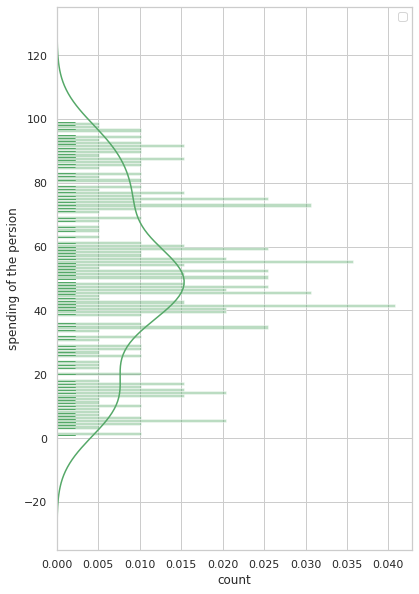

In [215]:

sns.set(style='whitegrid')
plt.subplot(1,2,2)
sns.distplot(mall['Spending Score (1-100)'],color='g',bins=100,vertical=True,rug=True)
plt.ylabel('spending of the persion')
plt.xlabel('count')
plt.legend()
plt.show()

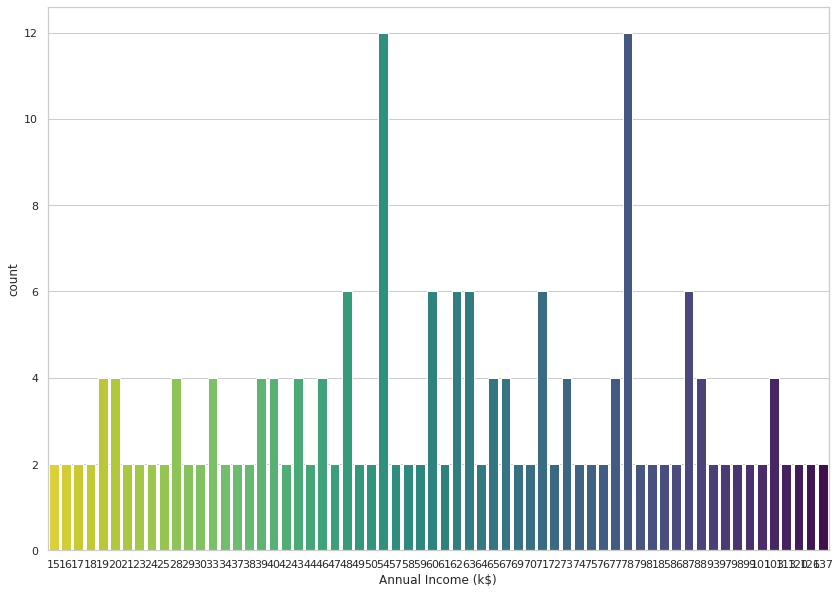

<Figure size 1080x1080 with 0 Axes>

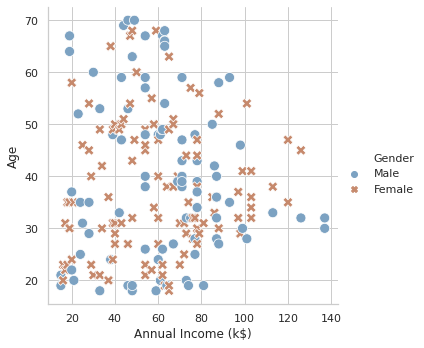

In [216]:
plt.rcParams['figure.figsize']=(14,10)
sns.countplot(mall['Annual Income (k$)'],palette='viridis_r')
#relation
plt.figure(figsize=(15,15))
sns.relplot(y='Age',x='Annual Income (k$)',hue='Gender',style='Gender',data=mall,s=100,label='Gender',palette='twilight_shifted')

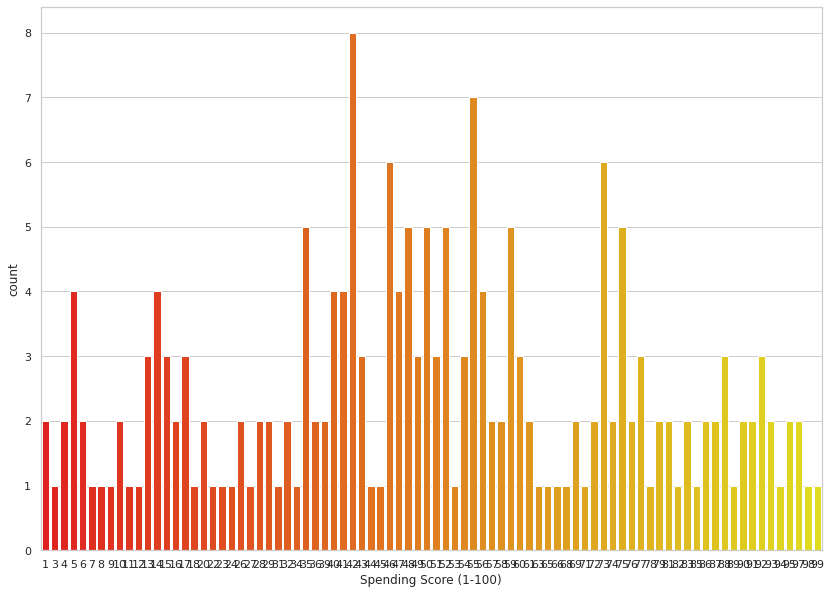

In [217]:
sns.countplot(mall['Spending Score (1-100)'], palette='autumn')

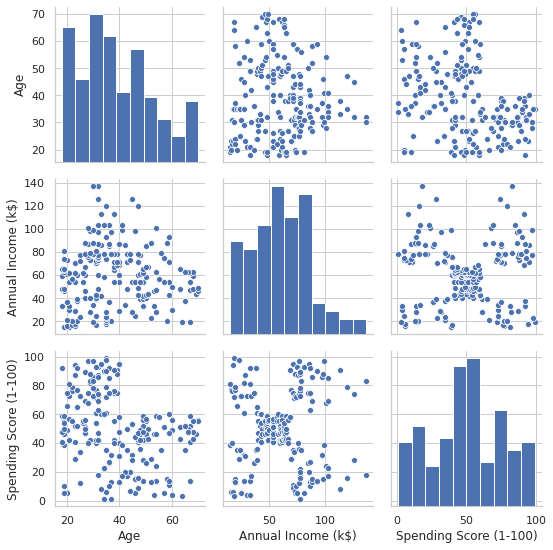

In [218]:
sns.pairplot(mall.drop('CustomerID',axis=1))

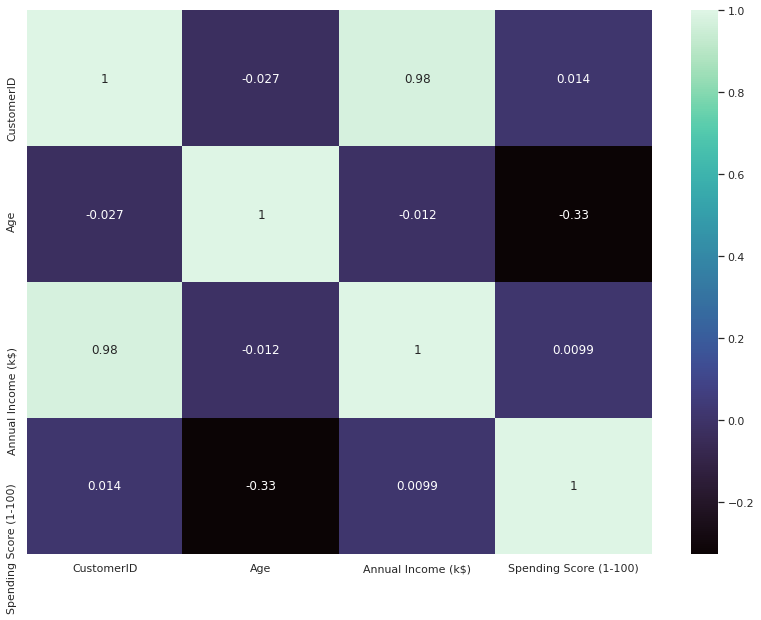

In [245]:
sns.heatmap(mall.corr(),annot=True,cmap='mako')

# Here we Apply clusters 

cluster using annual income  and spendiing score 

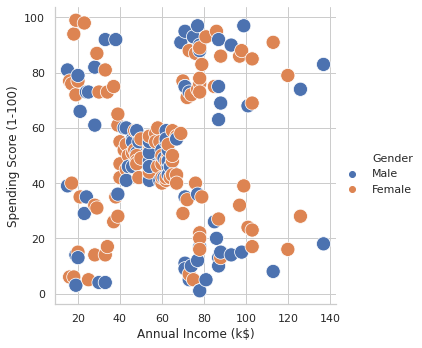

In [254]:
sns.relplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='Gender',s=200,data=mall)
x=mall.iloc[:,[3,4]].values

In [292]:
#here we need standerd scaler to the scale the data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(x)
scaled_x=scale.fit_transform(x)
scaled_x

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

# used k-means clustring 
using elbow method for optimal value (inertia:-sum of sequared distance and there closet point on the center)

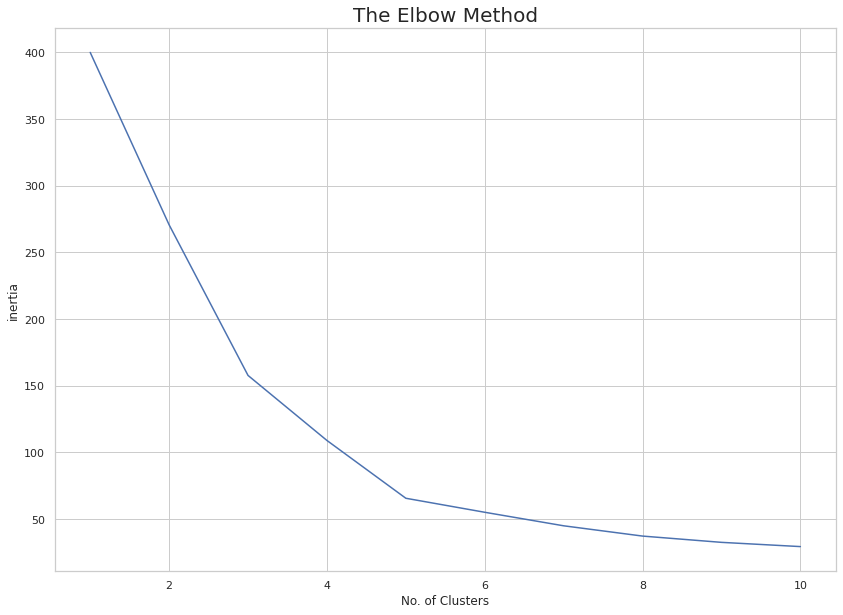

In [315]:
inertia=[]
from sklearn.cluster import KMeans
for k in range(1,11):
    kmm=KMeans(n_clusters=k,random_state=0,max_iter=300,n_init = 10,init ='k-means++')
    kmm.fit(scaled_x)
    inertia.append(kmm.inertia_)

plt.plot(range(1,11), inertia)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('inertia')
plt.show()

In [320]:
print(kmm.cluster_centers_)
print(kmm.labels_)

[[-1.35921337  1.19570407]
 [-0.03484644  0.08129692]
 [ 1.87564575 -1.09476801]
 [ 1.81769762  1.26275949]
 [-1.23585672 -0.65714315]
 [ 0.7489536  -1.45651437]
 [-0.61977303  0.07488804]
 [-1.37320883 -1.57680239]
 [ 0.66703804  1.23036618]
 [ 0.17856022 -0.39043398]]
[4 0 7 0 4 0 7 0 7 0 7 0 7 0 7 0 4 0 4 0 4 0 7 0 7 0 4 6 4 0 7 0 7 0 7 0 7
 0 4 0 4 0 4 6 4 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 1 1 1 1 1 9 1 1 9 1 1 1 1 1 1 1 1 9 1 9 9 1 1 1 9 1 9 1 1 1 1 9 1 9 9 1 1
 1 9 9 1 1 9 1 9 1 1 9 1 8 9 8 9 8 5 8 5 8 9 8 5 8 5 8 5 8 5 8 9 8 5 8 9 8
 5 8 5 8 5 8 5 8 5 8 5 8 9 8 5 8 5 8 5 8 5 8 5 8 5 8 5 8 5 8 5 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


# Visualizaing the Clusters

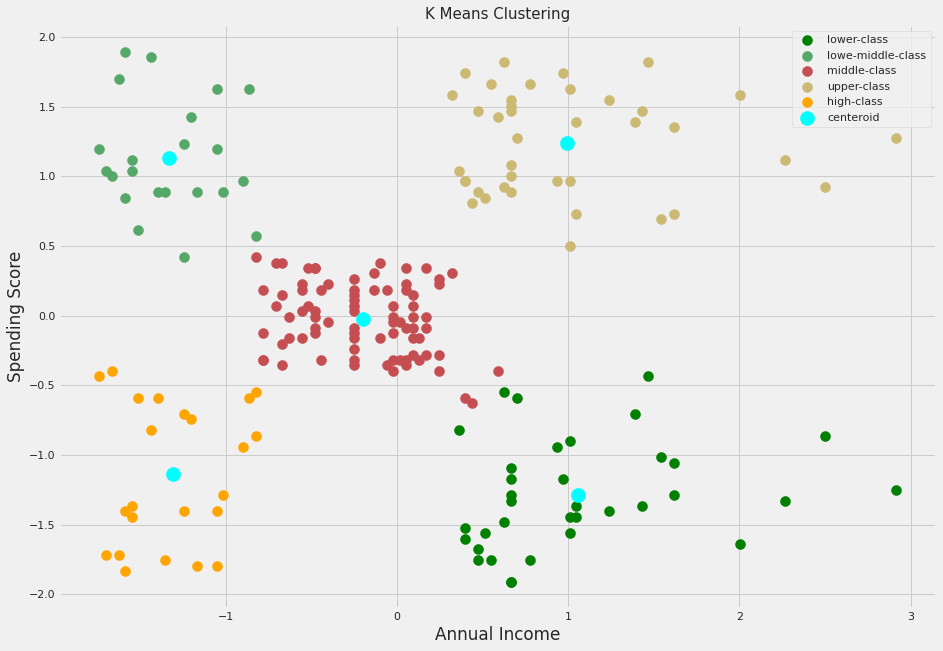

In [338]:
kmm=KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means=kmm.fit_predict(scaled_x)
print(y_means)

plt.scatter(scaled_x[y_means == 0, 0], scaled_x[y_means == 0, 1], s = 100, c = 'green', label = 'lower-class')
plt.scatter(scaled_x[y_means==1, 0], scaled_x[y_means==1, 1], s=100, c='g', label ='lowe-middle-class')
plt.scatter(scaled_x[y_means==2, 0], scaled_x[y_means==2, 1], s=100, c='r', label ='middle-class')
plt.scatter(scaled_x[y_means==3, 0], scaled_x[y_means==3, 1], s=100, c='y', label ='upper-class')
plt.scatter(scaled_x[y_means==4, 0], scaled_x[y_means==4, 1], s=100, c='orange', label ='high-class')
plt.scatter(kmm.cluster_centers_[:,0], kmm.cluster_centers_[:, 1], s = 200, c = 'cyan' , label = 'centeroid')
plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 15)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()
plt.show()

# #clustring based on there age

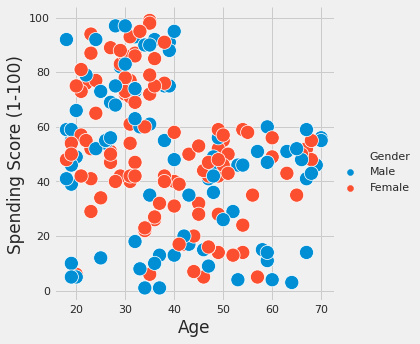

In [349]:
#age vs spending 
sns.relplot(x='Age',y='Spending Score (1-100)',hue='Gender',s=200,data=mall)

In [346]:
mall.head(1)
X = mall.iloc[:, [2, 4]].values
X

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [364]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(X)
scalex=scale.fit_transform(X)
scalex

array([[-1.42456879, -0.43480148],
       [-1.28103541,  1.19570407],
       [-1.3528021 , -1.71591298],
       [-1.13750203,  1.04041783],
       [-0.56336851, -0.39597992],
       [-1.20926872,  1.00159627],
       [-0.27630176, -1.71591298],
       [-1.13750203,  1.70038436],
       [ 1.80493225, -1.83237767],
       [-0.6351352 ,  0.84631002],
       [ 2.02023231, -1.4053405 ],
       [-0.27630176,  1.89449216],
       [ 1.37433211, -1.36651894],
       [-1.06573534,  1.04041783],
       [-0.13276838, -1.44416206],
       [-1.20926872,  1.11806095],
       [-0.27630176, -0.59008772],
       [-1.3528021 ,  0.61338066],
       [ 0.94373197, -0.82301709],
       [-0.27630176,  1.8556706 ],
       [-0.27630176, -0.59008772],
       [-0.99396865,  0.88513158],
       [ 0.51313183, -1.75473454],
       [-0.56336851,  0.88513158],
       [ 1.08726535, -1.4053405 ],
       [-0.70690189,  1.23452563],
       [ 0.44136514, -0.7065524 ],
       [-0.27630176,  0.41927286],
       [ 0.08253169,

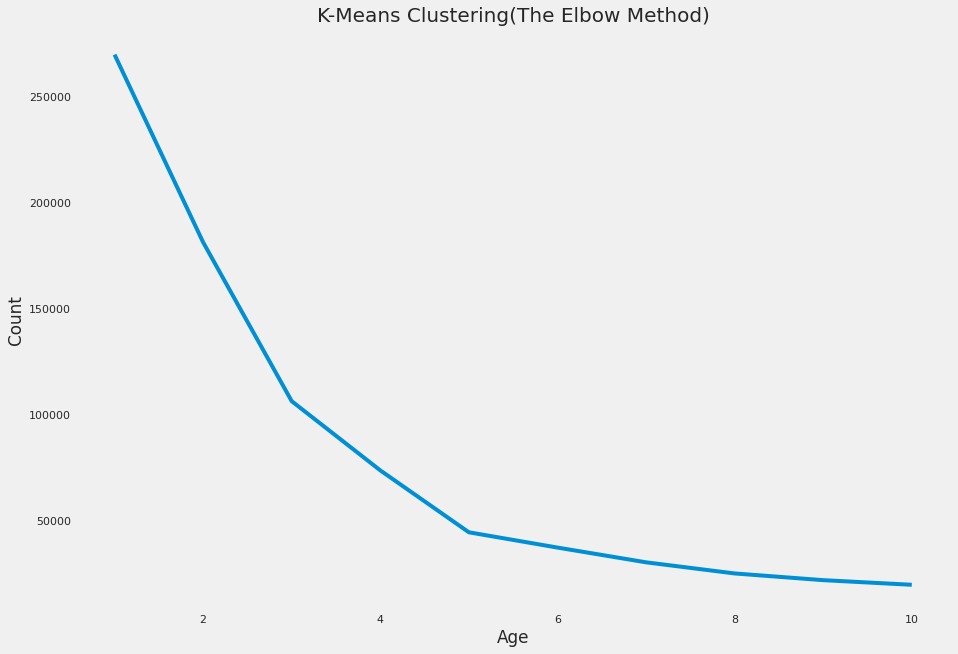

In [367]:
from sklearn.cluster import KMeans
inertia=[]
for n in range(1,11):
    km=KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=0.0001,random_state=0).fit(scalex)
    inertia.append(km.inertia_)
plt.plot(range(1, 11),inertia)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

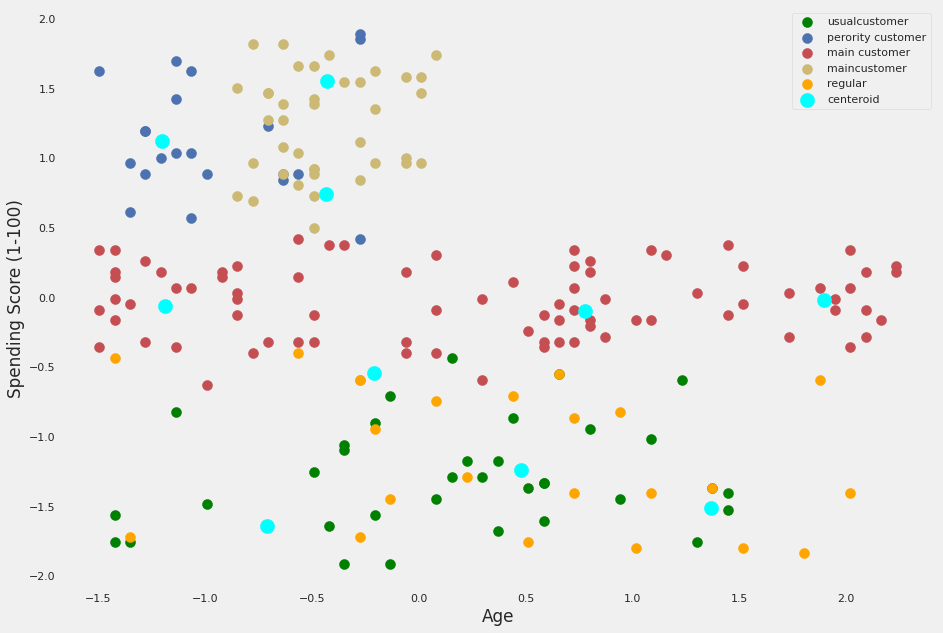

In [378]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(scalex)
plt.scatter(scalex[y_means == 0, 0], scalex[y_means == 0, 1], s = 100, c = 'green', label = 'usualcustomer')
plt.scatter(scalex[y_means == 1, 0], scalex[y_means == 1, 1], s = 100, c = 'b', label = 'perority customer')
plt.scatter(scalex[y_means == 2, 0], scalex[y_means == 2, 1], s = 100, c = 'r', label = 'main customer')
plt.scatter(scalex[y_means == 3, 0], scalex[y_means == 3, 1], s = 100, c = 'y', label = 'maincustomer')
plt.scatter(scalex[y_means == 4,0], scalex[y_means == 4, 1], s = 100, c = 'orange', label = 'regular')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 200, c = 'cyan' , label = 'centeroid')
plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

Hdbscan

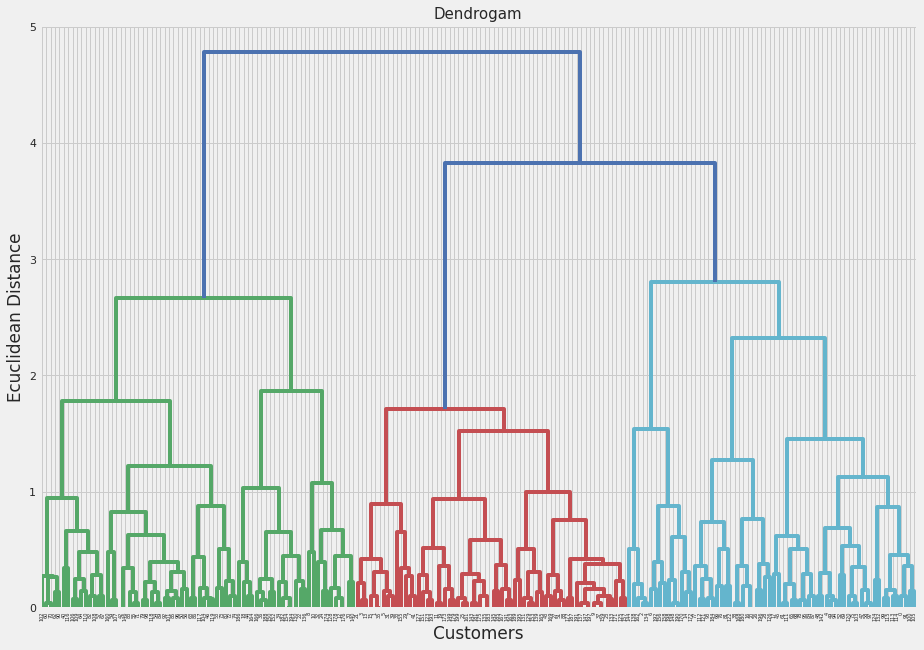

In [404]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(scalex, method = 'complete'))
plt.title('Dendrogam', fontsize = 15)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

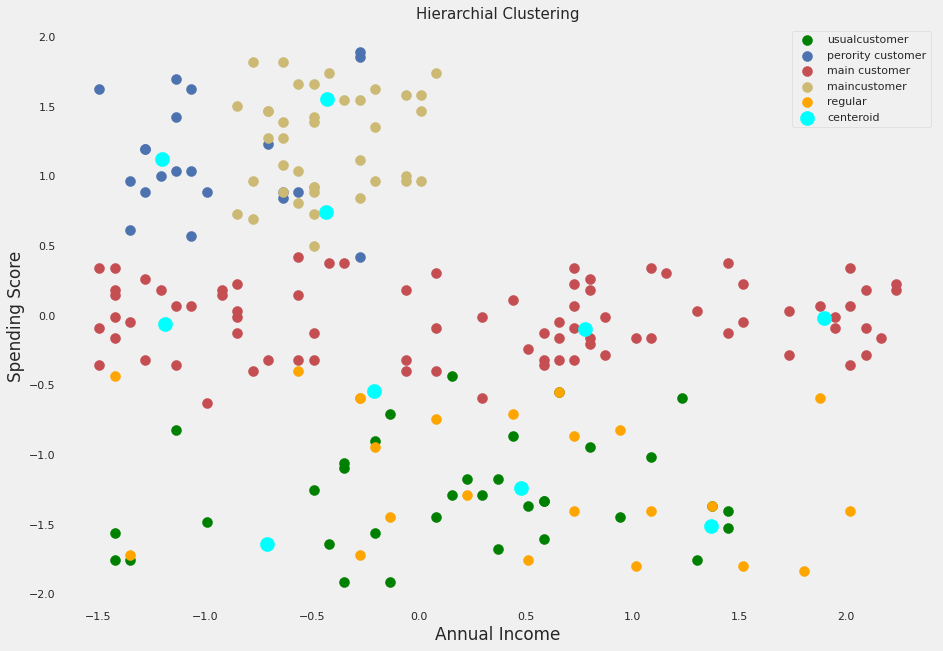

In [408]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(scaled_x)
plt.scatter(scalex[y_means == 0, 0], scalex[y_means == 0, 1], s = 100, c = 'green', label = 'usualcustomer')
plt.scatter(scalex[y_means == 1, 0], scalex[y_means == 1, 1], s = 100, c = 'b', label = 'perority customer')
plt.scatter(scalex[y_means == 2, 0], scalex[y_means == 2, 1], s = 100, c = 'r', label = 'main customer')
plt.scatter(scalex[y_means == 3, 0], scalex[y_means == 3, 1], s = 100, c = 'y', label = 'maincustomer')
plt.scatter(scalex[y_means == 4,0], scalex[y_means == 4, 1], s = 100, c = 'orange', label = 'regular')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 200, c = 'cyan' , label = 'centeroid')
plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 15)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

# DbscaN

In [412]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=3,min_samples=4)
#Fitting the model

model=dbscan.fit(scaled_x)

labels=model.labels_

In [413]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[dbscan.core_sample_indices_]=True

In [422]:
n_clusters=len(set(labels))- (1 if -1 in labels else 0)
n_clusters

1